# MNIST

Modified NIST (MNIST): corpus de imágenes en gris de dígitos manuscritos

Partición estándar: primeras muestras para training y restantes para test

Tarea muy popular: desde su introducción en los 90, MNIST ha sido muy usado como tarea para comparar técnicas de ML

Tarea "agotada": pues ya se han alcanzado tasas de error muy reducidas.

Más info: https://en.wikipedia.org/wiki/MNIST_database

In [2]:
import numpy as np; from sklearn.datasets import fetch_openml

mnist_784_X, mnist_784_y = fetch_openml('mnist_784', version=1, return_X_y=True, as_frame=False, parser='auto')

X_train = mnist_784_X[:60000].astype(np.float32); y_train = mnist_784_y[:60000].astype(np.uint8)
X_test = mnist_784_X[60000:].astype(np.float32); y_test = mnist_784_y[60000:].astype(np.uint8)
X_train /= 255; X_test /= 255 # normalización a [0,1]

print(X_train.shape, y_train.shape, X_test.shape, y_test.shape)

(60000, 784) (60000,) (10000, 784) (10000,)


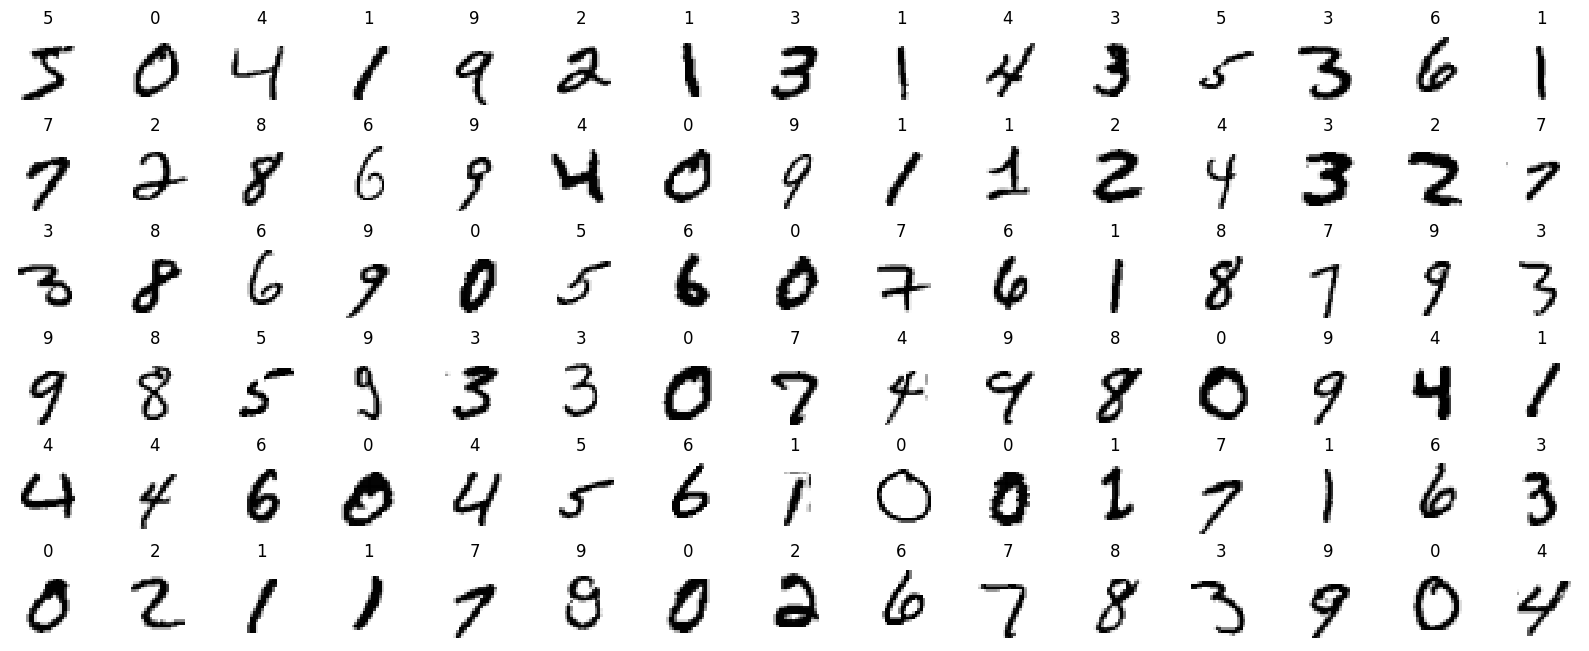

In [5]:
import matplotlib.pyplot as plt # type: ignore
nrows = 6; ncols = 15
_, axs = plt.subplots(nrows=nrows, ncols=ncols, figsize=(16, 16*nrows/ncols), constrained_layout=True)

for ax, x, y in zip(axs.flat, X_train, y_train):
  ax.set_axis_off(); image = x.reshape(28, 28); ax.set_title(y)
  ax.imshow(image, cmap=plt.cm.gray_r, interpolation="none")

#  Modelos lineales generativos

Clasificador generativo: **expresa posteriors en función de priors y densidades condicionales de las clases, las cuales
puede muestrearse para generar datos sintéticos**

In [6]:
import numpy as np; from sklearn.datasets import fetch_openml
mnist_784_X, mnist_784_y = fetch_openml('mnist_784', version=1, return_X_y=True, as_frame=False, parser='auto')

X_train = mnist_784_X[:60000].astype(np.float32); y_train = mnist_784_y[:60000].astype(np.uint8)
X_test = mnist_784_X[60000:].astype(np.float32); y_test = mnist_784_y[60000:].astype(np.uint8)
X_train /= 255; X_test /= 255 # normalización a [0,1]

In [7]:
import warnings; warnings.filterwarnings('ignore'); from sklearn.metrics import accuracy_score

## Naive Bayes

Clasificador naive Bayes Gaussiano (GNB): media y varianza de la característica **d en c**

In [8]:
from sklearn.naive_bayes import GaussianNB
clf = GaussianNB(var_smoothing=1e-9).fit(X_train, y_train)
acc = accuracy_score(y_test, clf.predict(X_test))
print(f'La precisión de {clf!s} es {acc:.1%}')

La precisión de GaussianNB() es 55.6%


## Análisis discriminante lineal (LDA)

In [10]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
clf = LinearDiscriminantAnalysis(tol=1e-4).fit(X_train, y_train)
acc = accuracy_score(y_test, clf.predict(X_test))
print(f'La precisión de {clf!s} es {acc:.1%}')

La precisión de LinearDiscriminantAnalysis() es 87.3%


## Análisis discriminante cuadrático (QDA)

In [11]:
from sklearn.decomposition import PCA
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV
pca = PCA(); qda = QuadraticDiscriminantAnalysis()
pipe = Pipeline(steps=[("pca", pca), ("qda", qda)])
G = {"pca__n_components": [60, 70, 80, None], "qda__reg_param": [0.01, 0.02, 0.05]}
GS = GridSearchCV(pipe, G, scoring='accuracy', refit=True, cv=5)
acc = GS.fit(X_train, y_train).score(X_test, y_test)
print(f'Precisión: {acc:.1%} con {GS.best_params_}')

Precisión: 96.6% con {'pca__n_components': 70, 'qda__reg_param': 0.02}


# Modelos lineales discriminativos

Clasificador discriminativo: modela posteriors directamente, **sin modelar priors ni densidades condicionales**.




In [12]:
import numpy as np; from sklearn.datasets import fetch_openml
mnist_784_X, mnist_784_y = fetch_openml('mnist_784', version=1, return_X_y=True, as_frame=False, parser='auto')
X_train = mnist_784_X[:60000].astype(np.float32); y_train = mnist_784_y[:60000].astype(np.uint8)
X_test = mnist_784_X[60000:].astype(np.float32); y_test = mnist_784_y[60000:].astype(np.uint8)
X_train /= 255; X_test /= 255 # normalización a [0,1]

## Regresión logística

In [16]:
from sklearn.linear_model import LogisticRegression; from sklearn.model_selection import GridSearchCV
G = {"solver": ["lbfgs"], "tol": [1e-4], "C": [1], "max_iter": [100]}
GS = GridSearchCV(LogisticRegression(random_state=23), G, scoring='accuracy', refit=True, cv=5)
acc = GS.fit(X_train, y_train).score(X_test, y_test)
print(f'Precisión: {acc:.1%} con {GS.best_params_}')

Precisión: 92.6% con {'C': 1, 'max_iter': 100, 'solver': 'lbfgs', 'tol': 0.0001}


## Ingeniería de características

In [17]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.pipeline import Pipeline
pca = PCA(); poly = PolynomialFeatures(); scaler = StandardScaler(); logreg = LogisticRegression()
pipe = Pipeline(steps=[("pca", pca), ("poly", poly), ("scaler", scaler), ("logreg", logreg)])
G = {"pca__n_components": [70], "poly__degree": [2], "logreg__C": [1]}
GS = GridSearchCV(pipe, G, scoring='accuracy', refit=True, cv=5)
acc = GS.fit(X_train, y_train).score(X_test, y_test)
print(f'Precisión: {acc:.1%} con {GS.best_params_}')


Precisión: 97.7% con {'logreg__C': 1, 'pca__n_components': 70, 'poly__degree': 2}


# Random Forests

In [18]:
import numpy as np; from sklearn.datasets import fetch_openml
mnist_784_X, mnist_784_y = fetch_openml('mnist_784', version=1, return_X_y=True, as_frame=False, parser='auto')
X_train = mnist_784_X[:60000].astype(np.float32); y_train = mnist_784_y[:60000].astype(np.uint8)
X_test = mnist_784_X[60000:].astype(np.float32); y_test = mnist_784_y[60000:].astype(np.uint8)
X_train /= 255; X_test /= 255 # normalización a [0,1]

import warnings; warnings.filterwarnings('ignore'); from sklearn.metrics import accuracy_score
from sklearn.ensemble import RandomForestClassifier; from sklearn.model_selection import GridSearchCV
clf = RandomForestClassifier(random_state=23)
G = {"n_estimators": [100, 200, 300, 400, 500], "max_depth": [None]}
GS = GridSearchCV(clf, G, scoring='accuracy', refit=True, cv=5, verbose=1)
acc = GS.fit(X_train, y_train).score(X_test, y_test)
print(f'Precisión: {acc:.1%} con {GS.best_params_}')


Fitting 5 folds for each of 5 candidates, totalling 25 fits


# Boosting

In [ ]:
import numpy as np; from sklearn.datasets import fetch_openml
mnist_784_X, mnist_784_y = fetch_openml('mnist_784', version=1, return_X_y=True, as_frame=False, parser='auto')
X_train = mnist_784_X[:60000].astype(np.float32); y_train = mnist_784_y[:60000].astype(np.uint8)
X_test = mnist_784_X[60000:].astype(np.float32); y_test = mnist_784_y[60000:].astype(np.uint8)
X_train /= 255; X_test /= 255 # normalización a [0,1]

import warnings; warnings.filterwarnings('ignore'); from sklearn.metrics import accuracy_score
from sklearn.ensemble import HistGradientBoostingClassifier; from sklearn.model_selection import GridSearchCV
clf = HistGradientBoostingClassifier(random_state=23)
G = {"max_depth": [4, 8, 16, None]}
GS = GridSearchCV(clf, G, scoring='accuracy', refit=True, cv=5, verbose=1)
acc = GS.fit(X_train, y_train).score(X_test, y_test)
print(f'Precisión: {acc:.1%} con {GS.best_params_}')

# Fashion-MNIST

In [ ]:
import numpy as np
from sklearn.datasets import fetch_openml
fashion_mnist_X, fashion_mnist_y = fetch_openml('Fashion-MNIST', return_X_y=True, as_frame=False, parser='auto')
X_train = fashion_mnist_X[:60000].astype(np.float32); y_train = fashion_mnist_y[:60000].astype(np.uint8)
X_test = fashion_mnist_X[60000:].astype(np.float32); y_test = fashion_mnist_y[60000:].astype(np.uint8)
X_train /= 255; X_test /= 255 # normalización a [0,1]
labels = ('T-Shirt', 'Trouser', 'Pullover', 'Dress', 'Coat', 'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle Boot')
print(X_train.shape, y_train.shape, X_test.shape, y_test.shape)

nrows = 2; ncols = 10
_, axs = plt.subplots(nrows=nrows, ncols=ncols, figsize=(16, 16*nrows/ncols), constrained_layout=True)
for ax, x, y in zip(axs.flat, X_train, y_train):
    ax.set_axis_off(); image = x.reshape(28, 28); ax.set_title(labels[y])
    ax.imshow(image, cmap=plt.cm.gray_r, interpolation="none")

### Ejercicio

In [ ]:
fashion_mnist_X, fashion_mnist_y = fetch_openml('Fashion-MNIST', return_X_y=True, as_frame=False, parser='auto')
X_train = fashion_mnist_X[:60000].astype(np.float32); y_train = fashion_mnist_y[:60000].astype(np.uint8)
X_test = fashion_mnist_X[60000:].astype(np.float32); y_test = fashion_mnist_y[60000:].astype(np.uint8)
X_train /= 255; X_test /= 255

clf = RandomForestClassifier(random_state=23)
G = {"n_estimators": [100, 200, 300, 400, 500], "max_depth": [None]}
GS = GridSearchCV(clf, G, scoring='accuracy', refit=True, cv=5, verbose=1)
acc = GS.fit(X_train, y_train).score(X_test, y_test)
print(f'Precisión: {acc:.1%} con {GS.best_params_}')